In [1]:
import pylab

import simulationRunner

#continuous modules
import continuous.link
import continuous.originNode
import continuous.destinationNode
import continuous.oneToOneNode

import discrete.link
import discrete.originNode
import discrete.destinationNode
import discrete.oneToOneNode
import trip


In [5]:
after_dem = 0.2
demands = [1.0, 1.0, 1.0, 1.0, 1.0]
demands.extend([after_dem for _ in range(10)])

total_time = 150
def run_continuous(time_step):
    inbound_link = continuous.link.Link(length=150, vf=30.0, w=6.0, kj=0.2)
    outbound_link = continuous.link.Link(length=150, vf=30.0, w=6.0, kj=0.1)

    #demands = [1.0, 0.4, 0.3]
    origin_node = continuous.originNode.OriginNode(1, inbound_link, demands)
    oneOneNode = continuous.oneToOneNode.OneToOneNode(2, inbound_link, outbound_link)
    destination_node = continuous.destinationNode.DestinationNode(3, outbound_link)

    links = [inbound_link, outbound_link]
    nodes = [origin_node, oneOneNode, destination_node]

    sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = time_step, total_time=total_time)
    sim.run()
    return sim

def run_discrete(time_step):
    inbound_link = discrete.link.Link(length=150, vf=30.0, w=6.0, kj=0.2, initial_capacity=0)
    outbound_link = discrete.link.Link(length=150, vf=30.0, w=6.0, kj=0.1, initial_capacity=0)

    #demands = [1.0, 0.4, 0.3]
    trips = trip.Trip.from_continuous_demand(demands, total_time, [1,2])
    origin_node = discrete.originNode.OriginNode(1, inbound_link, trips)
    oneOneNode = discrete.oneToOneNode.OneToOneNode(2, inbound_link, outbound_link)
    destination_node = discrete.destinationNode.DestinationNode(3, outbound_link)

    links = [inbound_link, outbound_link]
    nodes = [origin_node, oneOneNode, destination_node]

    sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = time_step, total_time=total_time)
    sim.run()
    return sim


In [6]:
result_continuous = run_continuous(1.0)

results_by_tstep = {}
for tstep in [1.0, 3.0, 6.0]:
    results_by_tstep[tstep] = run_discrete(tstep)

[0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.0, -0.5, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.20000000000000284, 0.0, 0.7999999999999972, 0.5999999999999943, 0.3999999999999915, 0.19999999999998863, -1.4210854715202004e-14, 0.799999999999983, 0.5999999999999801, 0.39999999999997726, 0.19999999999997442, -2.842170943040401e-14, 0.7999999999999687, 0.5999999999999659, 0.39999999999996305, 0.1999999999999602, -4.263256414560601e-14, 0.7999999999999545, 0.5999999999999517, 0.39999999999994884, 0.199999999999946, -5.684341886080802e-14, 0.7999999999999403, 0.5999999999999375, 0.39999999999993463, 0.1999999999999318, -7.105427357601002e-14

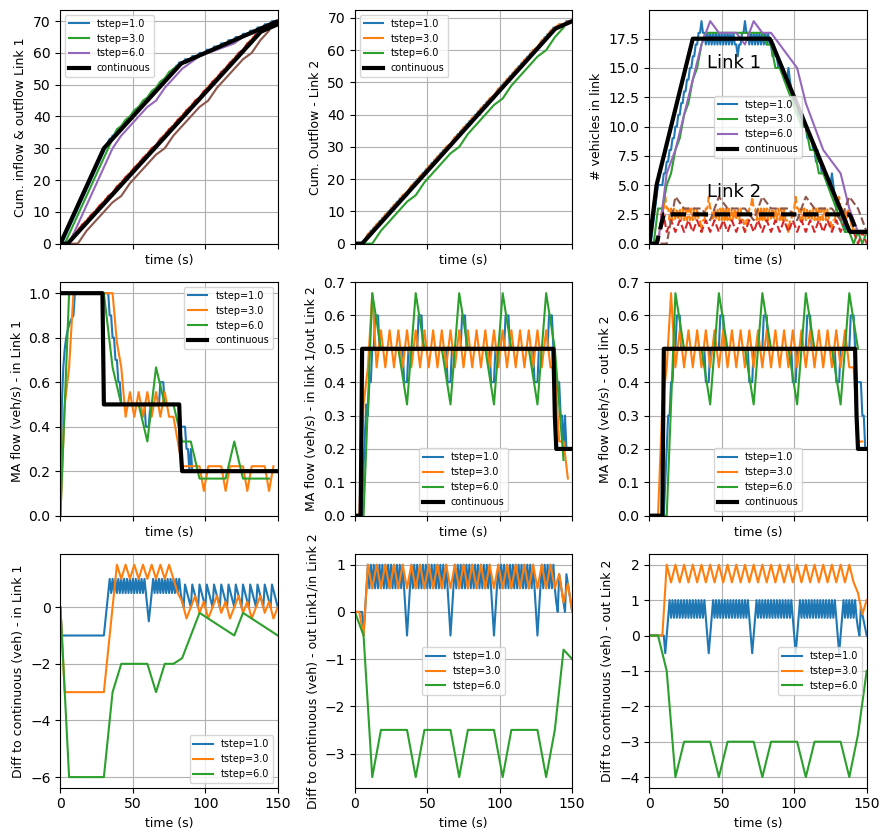

In [ ]:
f, axs = pylab.subplots(3,3, figsize=(9,8.5), sharex=True)

from_time = 0
to_time = 150




for tstep in results_by_tstep:
    from_step = int(from_time/tstep)
    to_step = int(to_time/tstep)

    axs[0,0].plot(results_by_tstep[tstep].get_times(1)[from_step:to_step], 
                  results_by_tstep[tstep].links[0].cumulative_inflows[from_step:to_step], label='D={}s'.format(tstep))
    axs[0,0].plot(results_by_tstep[tstep].get_times(1)[from_step:to_step], 
                results_by_tstep[tstep].links[0].cumulative_outflows[from_step:to_step], )
    axs[0,1].plot(results_by_tstep[tstep].get_times(1)[from_step:to_step], 
                 results_by_tstep[tstep].links[1].cumulative_inflows[from_step:to_step], label='D={}'.format(tstep))
    #axs[0,1].plot(results_by_tstep[tstep].get_times(1)[from_step:to_step], 
    #             results_by_tstep[tstep].links[1].cumulative_outflows[from_step:to_step], linewidth=1)
    

    #let's get 10 seconds average flow
    f1s = []
    f2s = []
    f3s = []

    shift = int(10/tstep)
    for t in range(len(results_by_tstep[tstep].get_times())):
        if t < shift:
            s = 1+t
        else:
            s = shift

        f1s.append((results_by_tstep[tstep].links[0].cumulative_inflows[t+1]-results_by_tstep[tstep].links[0].cumulative_inflows[t-s+1])/s)
        f2s.append((results_by_tstep[tstep].links[1].cumulative_inflows[t+1]-results_by_tstep[tstep].links[1].cumulative_inflows[t-s+1])/s)
        f3s.append((results_by_tstep[tstep].links[1].cumulative_outflows[t+1]-results_by_tstep[tstep].links[1].cumulative_outflows[t-s+1])/s)
    
    axs[1,0].plot(results_by_tstep[tstep].get_times(), [f/tstep for f in f1s], label='D={}s'.format(tstep))
    axs[1,1].plot(results_by_tstep[tstep].get_times(), [f/tstep for f in f2s], label='D={}s'.format(tstep))
    axs[1,2].plot(results_by_tstep[tstep].get_times(), [f/tstep for f in f3s], label='D={}s'.format(tstep))

    
    n_v1 = [results_by_tstep[tstep].links[0].cumulative_inflows[t]-results_by_tstep[tstep].links[0].cumulative_outflows[t] for t in range(len(results_by_tstep[tstep].get_times(1)))]
    axs[0,2].plot(results_by_tstep[tstep].get_times(1), n_v1, label='D={}s'.format(tstep))

    ts = results_by_tstep[tstep].get_times(1)
    axs[2,0].plot(results_by_tstep[tstep].get_times(1),
                       [results_by_tstep[tstep].links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_inflows[t*int(tstep)] for t in range(len(ts))],
                        label='D={}s'.format(tstep))
    axs[2,1].plot(results_by_tstep[tstep].get_times(1),
                          [results_by_tstep[tstep].links[1].cumulative_inflows[t]-result_continuous.links[1].cumulative_inflows[t*int(tstep)] for t in range(len(ts))],
                            label='D={}s'.format(tstep))
    axs[2,2].plot(results_by_tstep[tstep].get_times(1),
                            [results_by_tstep[tstep].links[1].cumulative_outflows[t]-result_continuous.links[1].cumulative_outflows[t*int(tstep)] for t in range(len(ts))],
                                label='D={}s'.format(tstep))
    
    n_v2 = [results_by_tstep[tstep].links[1].cumulative_inflows[t]-results_by_tstep[tstep].links[1].cumulative_outflows[t] for t in range(len(results_by_tstep[tstep].get_times(1)))]
    axs[0,2].plot(results_by_tstep[tstep].get_times(1), n_v2,linestyle='--')
    
    print( [results_by_tstep[tstep].links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_inflows[t*int(tstep)] for t in range(len(ts))])

axs[0,0].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[0].cumulative_inflows[from_time:to_time], color='black', label='C=1s', linewidth=3)
axs[0,0].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[0].cumulative_outflows[from_time:to_time], color='black',  linewidth=3)
axs[0,1].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[1].cumulative_inflows[from_time:to_time], color='black', label='C=1s', linewidth=3)
#axs[0,1].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[1].cumulative_outflows[from_time:to_time], color='black', linewidth=2)

n_v1 = [result_continuous.links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_outflows[t] for t in range(len(result_continuous.get_times(1)))]
n_v2 = [result_continuous.links[1].cumulative_inflows[t]-result_continuous.links[1].cumulative_outflows[t] for t in range(len(result_continuous.get_times(1)))]
axs[0,2].plot(result_continuous.get_times(1), n_v1, color='black', label='C=1s', linewidth=3)
axs[0,2].plot(result_continuous.get_times(1), n_v2, color='black', linestyle='--', linewidth=3)

f1s = [result_continuous.links[0].cumulative_inflows[t+1]-result_continuous.links[0].cumulative_inflows[t] for t in range(len(result_continuous.get_times()))]
f2s = [result_continuous.links[1].cumulative_inflows[t+1]-result_continuous.links[1].cumulative_inflows[t] for t in range(len(result_continuous.get_times()))]
f3s = [result_continuous.links[1].cumulative_outflows[t+1]-result_continuous.links[1].cumulative_outflows[t] for t in range(len(result_continuous.get_times()))]

axs[1,0].plot(result_continuous.get_times(), [f for f in f1s], color='black', label='C=1s', linewidth=3)
axs[1,1].plot(result_continuous.get_times(), [f for f in f2s], color='black', label='C=1s', linewidth=3)
axs[1,2].plot(result_continuous.get_times(), [f for f in f3s], color='black', label='C=1s', linewidth=3)


fsize=9
for i in range(3):
    for j in range(3):
        axs[i,j].grid()
        axs[i,j].set_xlim(from_time, to_time)
        axs[i,j].set_xlabel('time (s)', fontsize=fsize)
        axs[i,j].legend(fontsize=7)
        if i < 2:
            axs[i,j].set_ylim(0, None)
        #axs[i,j].set_ylabel('cumulative inflow')



#let's anotate in the number of vehicles in the link to point out which link is which.
axs[0,2].annotate('Link 1', xy=(50, 16), xytext=(40, 15), xycoords='data', fontsize=fsize+4)
axs[0,2].annotate('Link 2', xy=(50, 4), xytext=(40, 4), xycoords='data', fontsize=fsize+4)

axs[0,0].set_ylabel("Cum. inflow & outflow Link 1", fontsize=fsize)
axs[0,1].set_ylabel("Cum. Outflow - Link 2", fontsize=fsize)
axs[0,2].set_ylabel("# vehicles in link", fontsize=fsize)
axs[1,0].set_ylabel("MA flow (veh/s) - in Link 1 ", fontsize=fsize)
axs[1,1].set_ylabel("MA flow (veh/s) - in link 1/out Link 2", fontsize=fsize)
axs[1,2].set_ylabel("MA flow (veh/s) - out link 2", fontsize=fsize)

axs[2,0].set_ylabel("Diff to continuous (veh) - in Link 1", fontsize=fsize)
axs[2,1].set_ylabel("Diff to continuous (veh) - out Link1/in Link 2", fontsize=fsize)
axs[2,2].set_ylabel("Diff to continuous (veh) - out Link 2", fontsize=fsize)

pylab.tight_layout()

pylab.show()